In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
dataPath = "/media/anthe/ssd_anthe/su/aerosols/SO2/individual_files"
figuresPath = "../figures/"

dataSO2 = xr.open_dataset(f'{dataPath}/SO2-em-anthro_fldsum.nc').squeeze()
dataPath = "/media/anthe/ssd_anthe/su/aerosols/NH3/individual_files"
dataNH3 = xr.open_dataset(f'{dataPath}/NH3-em-anthro_fldsum.nc').squeeze()

MACSP_dir = '/home/anthe/documents/misu/thesis/'
fig_dir = '/home/anthe/documents/misu/thesis/figures/'

macsp = xr.open_dataset(f'{MACSP_dir}/MAC-SP.nc')

In [32]:
macsp.ftr_weight

<xarray.DataArray 'ftr_weight' (plume_number: 9, plume_feature: 2)>
array([[0.4     , 0.6     ],
       [0.6     , 0.4     ],
       [0.857143, 0.142857],
       [0.6     , 0.4     ],
       [0.8     , 0.2     ],
       [0.125   , 0.875   ],
       [0.4     , 0.6     ],
       [0.7     , 0.3     ],
       [0.8     , 0.2     ]], dtype=float32)
Coordinates:
  * plume_number   (plume_number) int32 1 2 3 4 5 6 7 8 9
  * plume_feature  (plume_feature) int32 1 1
Attributes:
    units:       
    long_name:  Feature Weight

In [4]:
yearsumSO2 = (dataSO2.SO2_em_anthro.sel(time=dataSO2.time.dt.month.isin([1,3,5,7,8,10,12]))*3600*24*31).groupby('time.year').sum(dim='time') + (dataSO2.SO2_em_anthro.sel(time=dataSO2.time.dt.month.isin([2,4,6,9,11]))*3600*24*30).groupby('time.year').sum(dim='time')

yearsumNH3 = (dataNH3.NH3_em_anthro.sel(time=dataNH3.time.dt.month.isin([1,3,5,7,8,10,12]))*3600*24*31).groupby('time.year').sum(dim='time') + (dataNH3.NH3_em_anthro.sel(time=dataNH3.time.dt.month.isin([2,4,6,9,11]))*3600*24*30).groupby('time.year').sum(dim='time')

In [5]:
21.81*10**12/(yearsumSO2.sum(dim='sector').sel(year=1899)*1000)

<xarray.DataArray 'SO2_em_anthro' ()>
array(2.0756166e+09)
Coordinates:
    lon      float64 0.0
    lat      float64 0.0
    year     int64 1899

In [6]:
5.52*10**12/(yearsumNH3.sum(dim='sector').sel(year=1850)*1000)

<xarray.DataArray 'NH3_em_anthro' ()>
array(2.26684506e+09)
Coordinates:
    lon      float64 0.0
    lat      float64 0.0
    year     int64 1850

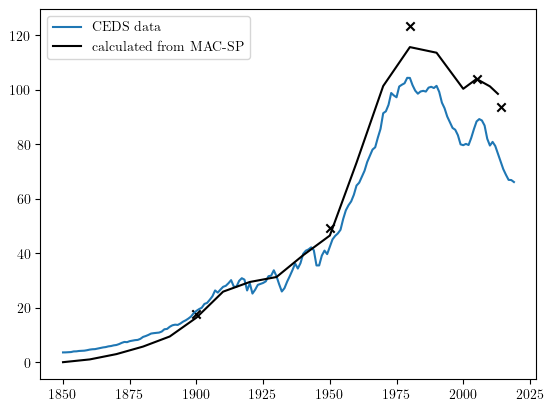

In [34]:
time = np.arange(1850, 2020, 1)
#plt.plot(time, yearsumSO2.sum(dim='sector')*2*10**12)
plt.plot(time, 0.645*yearsumSO2.sum(dim='sector')*2.2 + 0.355*yearsumNH3.sum(dim='sector')*2.2, label='CEDS data')# + yearsumNH3.sum(dim='sector')*2.27)
time2 = np.arange(1850, 2014, 1)
plt.plot(time2, sum, color='black', label='calculated from MAC-SP')
plt.scatter(emission.index, emission, color='black', marker='x')
plt.legend()
plt.savefig('../../figures/ceds-emissions.pdf')


0

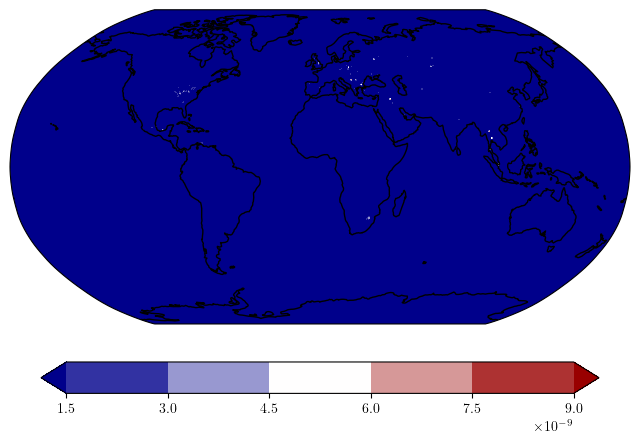

In [12]:
cd 

In [8]:
emissions = pd.DataFrame({
    'Europe': [8.95, 18.26, 56.80, 16.41, 11.35],
    'North America': [7.65, 24.09, 29.32, 17.45, 7.39],
    'East Asia': [0.17, 1.69, 14.72, 37.36, 34.89],
    'South Asia': [0.18, 1.57, 9.18, 17.17, 22.89],
    'North Africa': [0.08, 0.20, 1.02, 1.70, 1.94],
    'South America': [0.12, 1.24, 4.81, 4.88, 5.26],
    'Maritime Continent': [0.03, 0.22, 2.13, 4.15, 4.43],
    'South Central Africa': [0.04, 1.42, 3.83, 3.35, 4.29],
    'Australia': [0.23, 0.63, 1.61, 1.57, 1.39]
},
index=[1900, 1950, 1980, 2005, 2014])
sum = macsp.year_weight.sel(plume_number=1).isel(years=slice(0,164)).values * 0

for year in range(0, 164, 1):
    for plume_number in range(1, 10 ,1):
        sum[year] = sum[year] + macsp.year_weight.sel(plume_number=plume_number).isel(years=year)*emissions.iloc[:, plume_number-1].loc[2005]

emission = pd.DataFrame({
    'Global': [17.54, 49.32, 123.42, 104.04, 93.83]
},
index=[1900, 1950, 1980, 2005, 2014])